In [43]:
import os.path
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
import glob

%matplotlib inline

re_debug_infos = re.compile("^.*debug_infos.*$")

def moving_average(data, step):
    N = len(data) - step
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[i:i+step])
    return res

def analyze_experience(exp_dir, show_episode_len=True):
    """
    plot episode len
    """
    print exp_dir
    episode_len_fn = exp_dir + "/episode_len.p"
    if show_episode_len and os.path.isfile(episode_len_fn):
        episode_len = pickle.load(open(episode_len_fn, "r"))
        plt.figure(figsize=(15,15))
        for i, agent in enumerate(episode_len.T):
            plt.plot(moving_average(agent, 100), label='agent '+str(i))
        plt.legend()
        plt.title("episode len " + exp_dir)
        plt.show()

def analyze_batch(exp_dir):
    print exp_dir
    batch_files = glob.glob(exp_dir + "/*2980000*")
    if len(batch_files) == 0:
        print "no batch files, return"
        return

    for batch in batch_files:
        s = pickle.load(open(batch, "r"))
        print len(s)
        if len(s) == 7:
            a, c, X, R, mask, X_b, b = s
        elif len(s) == 6:
            a, X, R, mask, X_b, b = s
        elif len(s) == 5:
            a, X, R, mask, b = s

        def imshow(data, title):
            plt.figure(figsize=(30,10))
            im = plt.imshow(data)#, label='agent '+str(i))
            plt.colorbar(im,fraction=0.006, pad=0.04)
            plt.title(title + exp_dir)
            plt.show()
        end = 64
        i=np.argmin(mask.sum(axis=1))
        imshow(c.mean(axis=0), "mean c over batch")
        imshow(a.mean(axis=0), "mean c over batch")

        imshow(X.mean(axis=0), "mean goal landmark over batch")

        imshow((R)[:end], "return ")
        imshow((b*mask)[:end], "baseline")
        imshow(((R-b)*mask)[:end], "advantage ")

        imshow(mask[:end], "mask ")
        imshow(X_b[i].T, "X_b ")
        imshow(X[i].T, "X ")
        imshow(c[i].T, "c ")
        print "X_b",X_b[i,:end,:].T
        print "X", X[i,:end,:].T
        print "mask",mask[i,:end].T

        print "R",R[i,:end].T
        print "b",b[i,:end].T
        print "R-b",(R-b)[i,:end].T


exp dir res_coop/a1_vocab_size-10_n_landmarks-3_grid_size-5_experience_memory-10000_bs-128_n_agents-2_lr-0.001_algo-rpg_baseline_rec_freq_train-250_n_iter_per_train-10_n_hidden-20_gamma-0.9_max_episode_len-50_
res_coop/a1_vocab_size-10_n_landmarks-3_grid_size-5_experience_memory-10000_bs-128_n_agents-2_lr-0.001_algo-rpg_baseline_rec_freq_train-250_n_iter_per_train-10_n_hidden-20_gamma-0.9_max_episode_len-50_
7


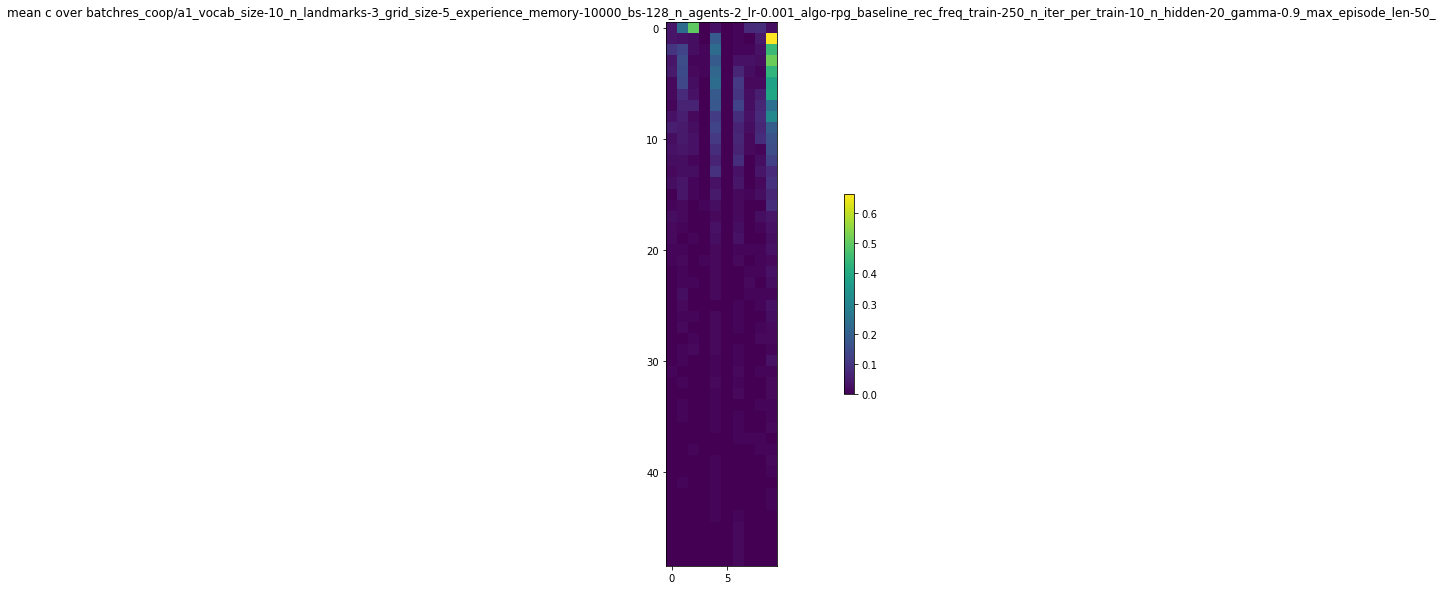

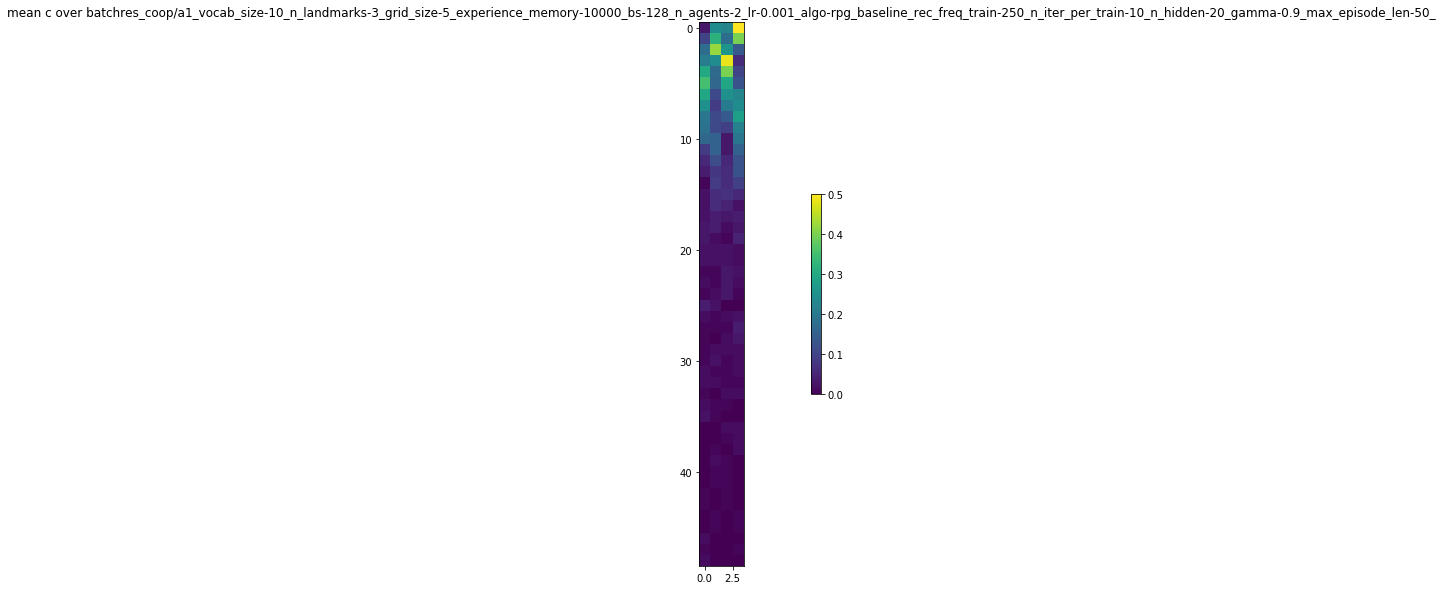

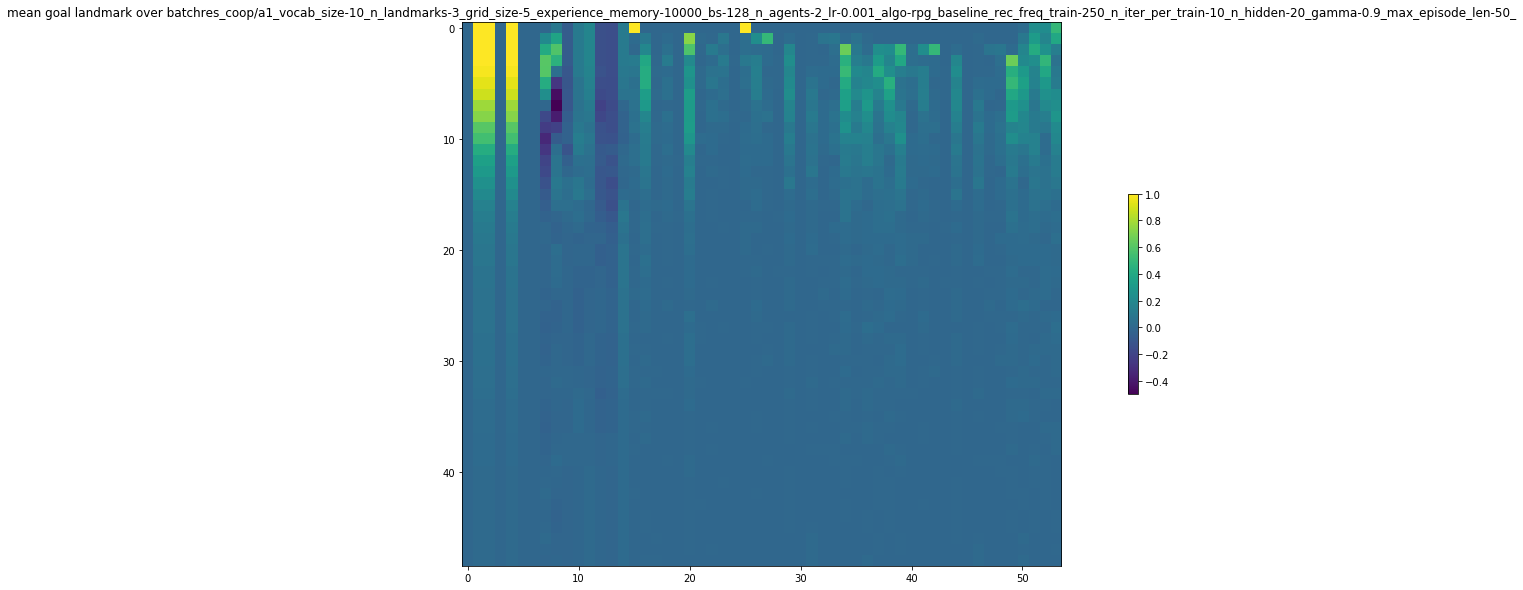

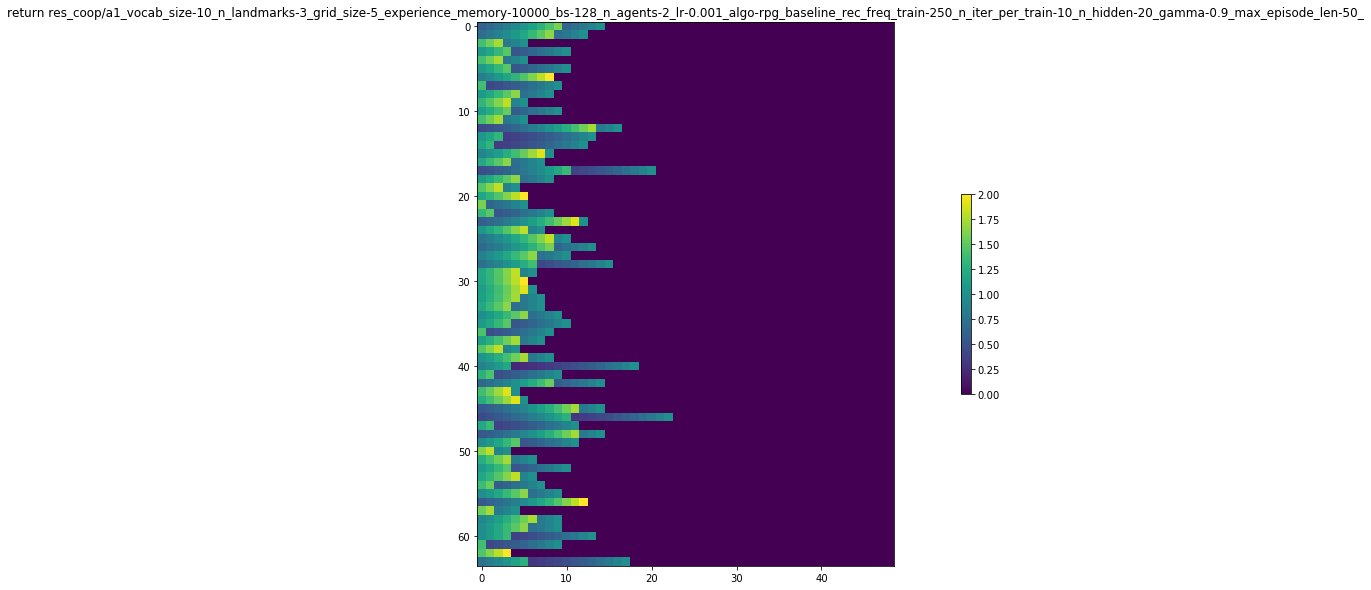

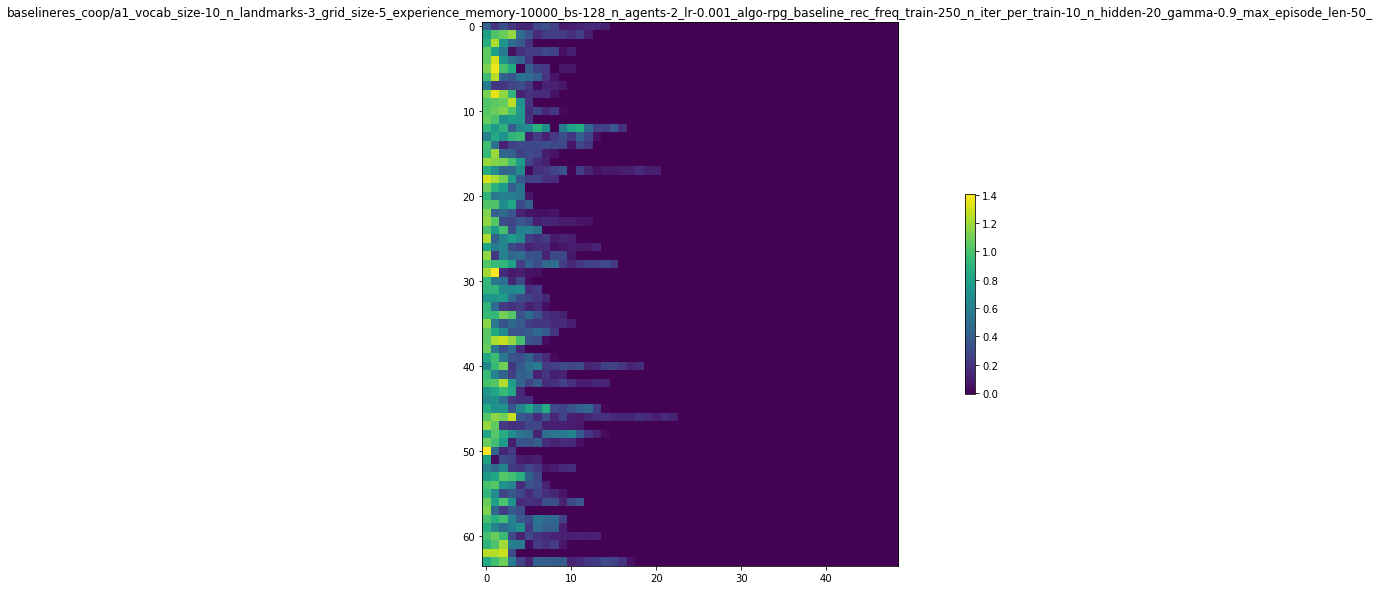

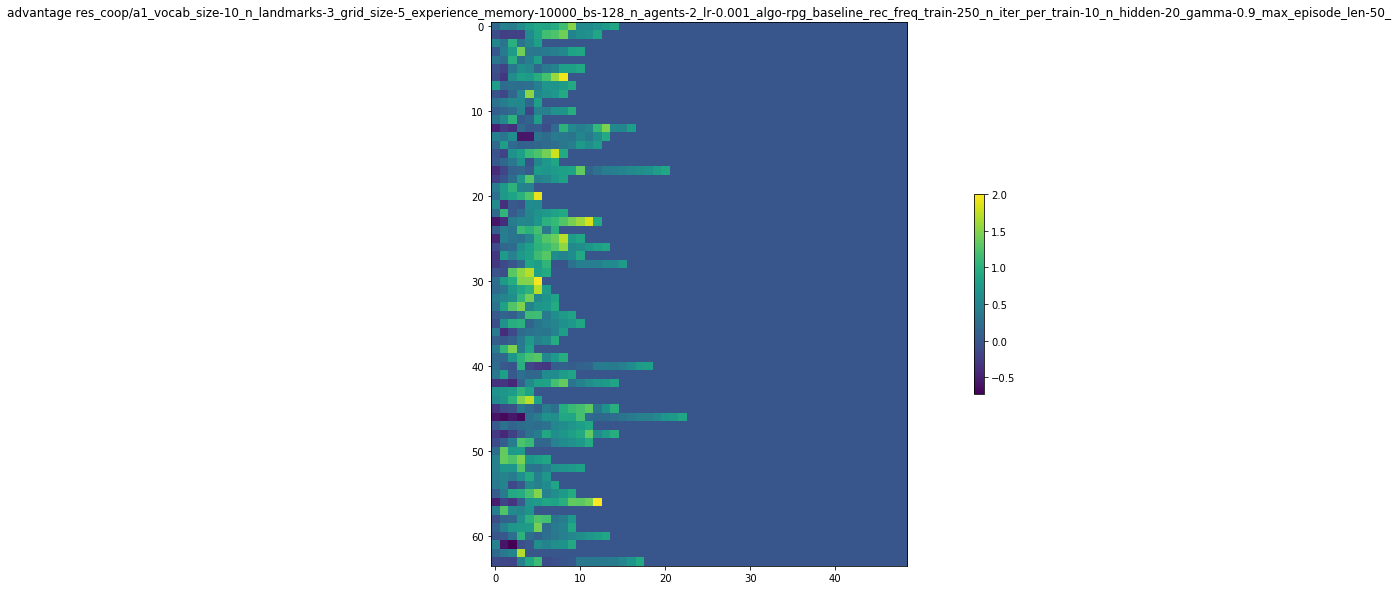

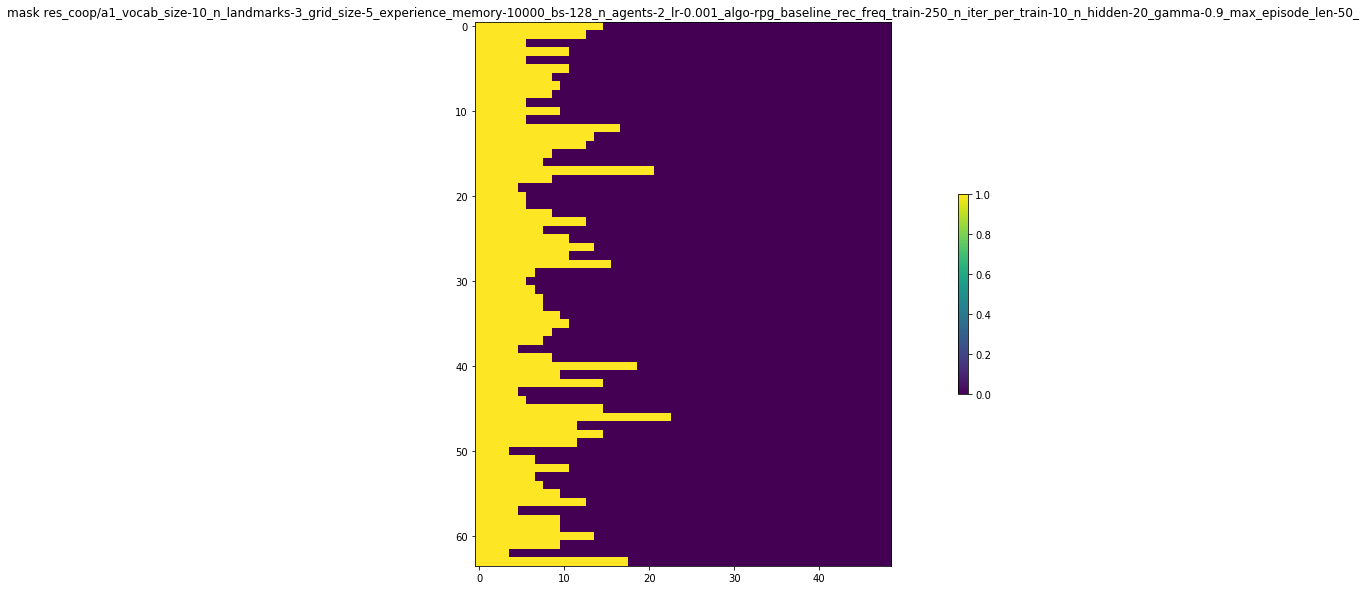

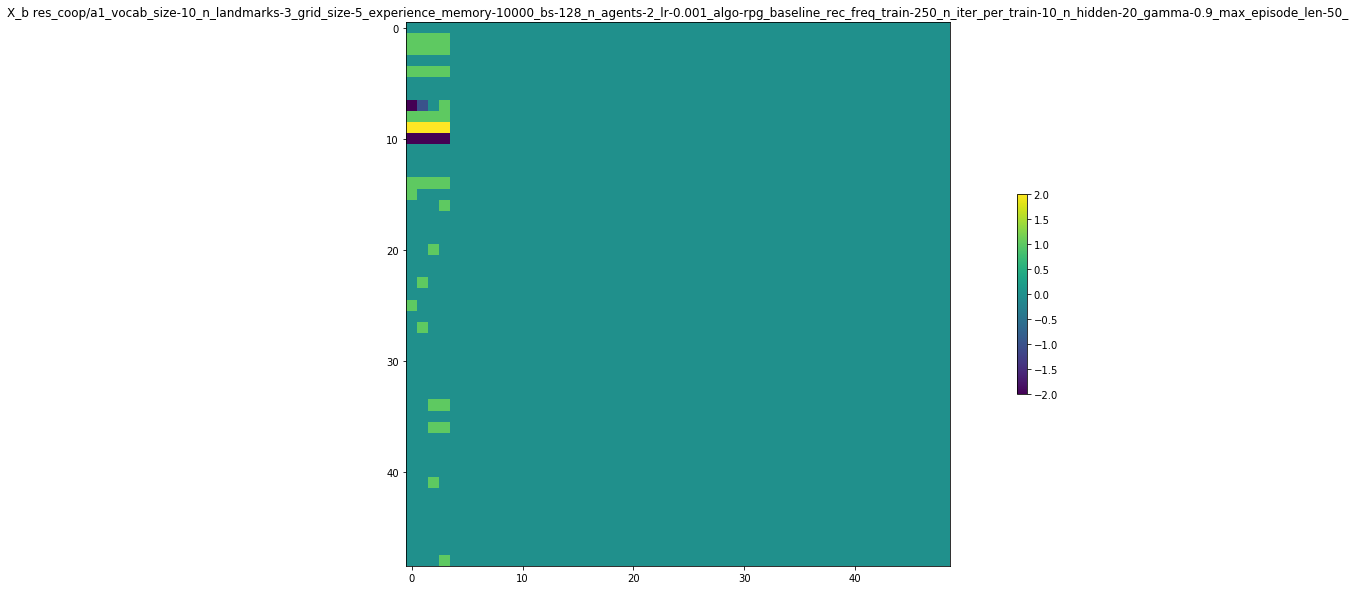

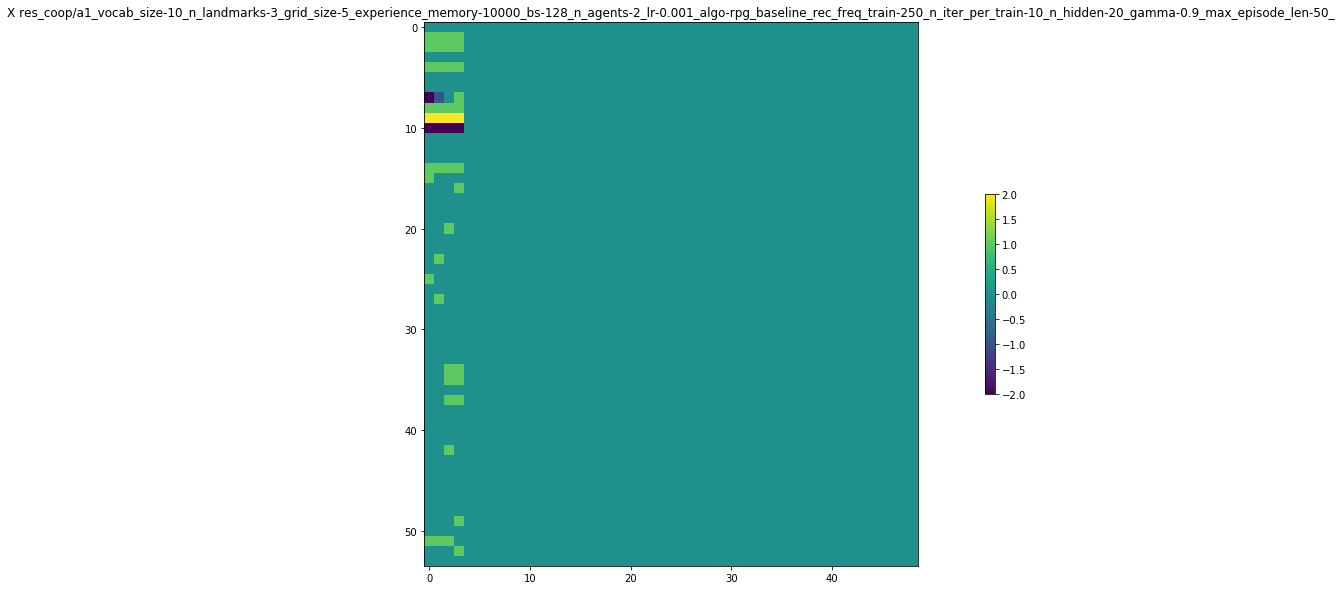

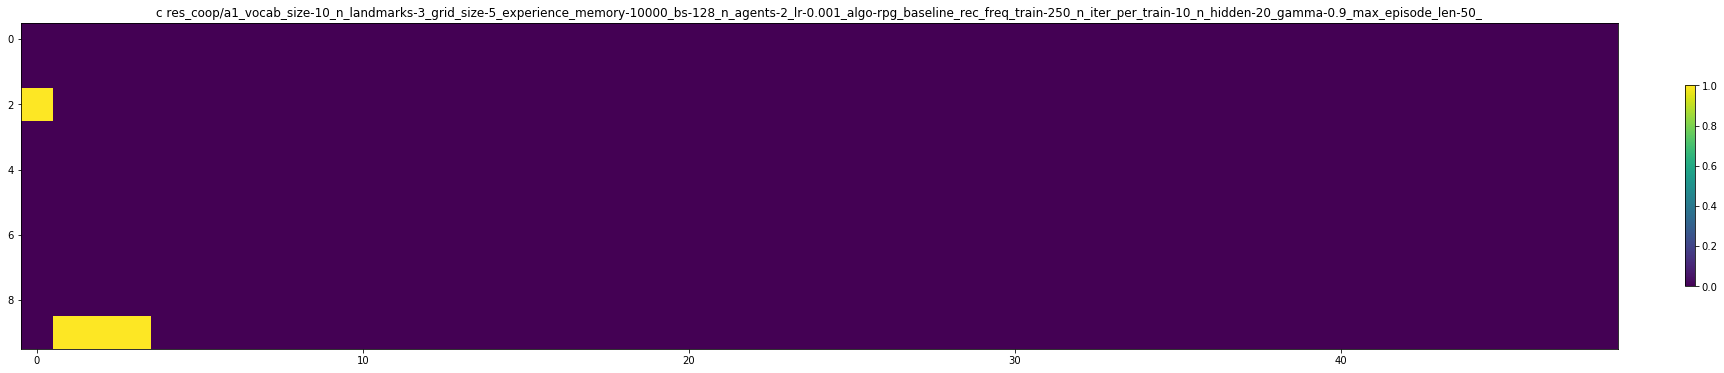

X_b [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
X [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
mask [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
R [ 1.71  1.9   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
b [ 1.14614494  0.55502227  0.44441003  0.44441003  0.44441003  0.44441003
  0.44441003  0.444

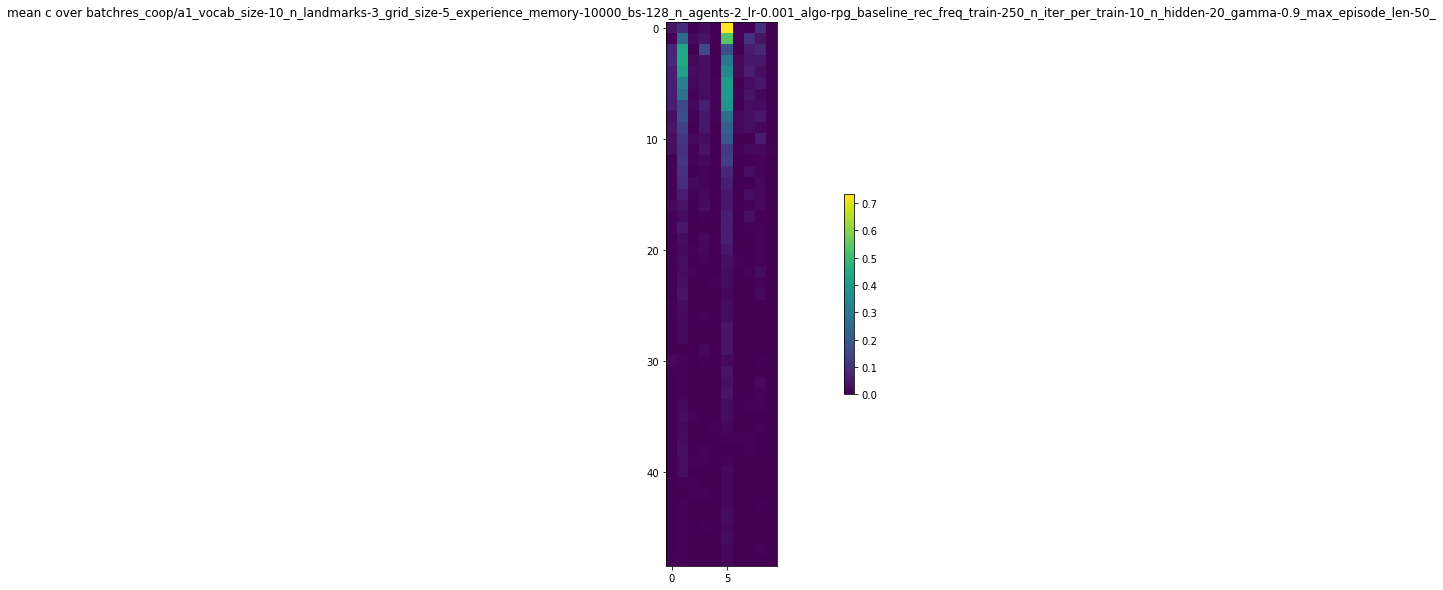

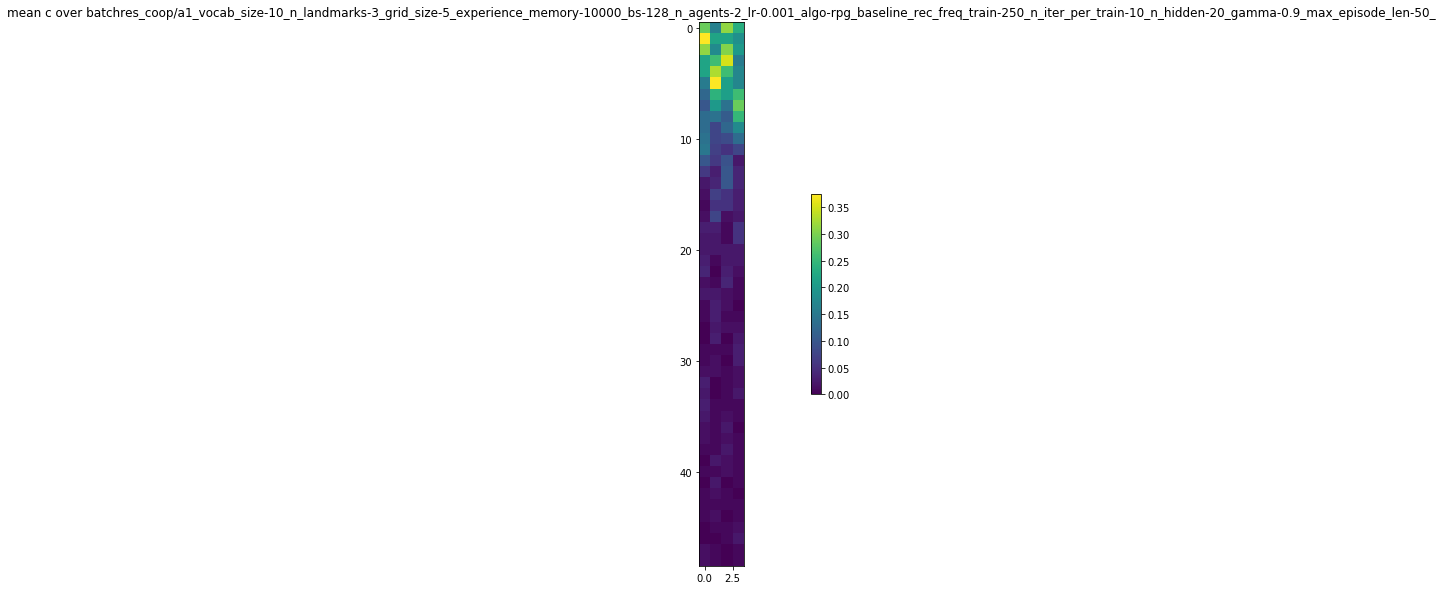

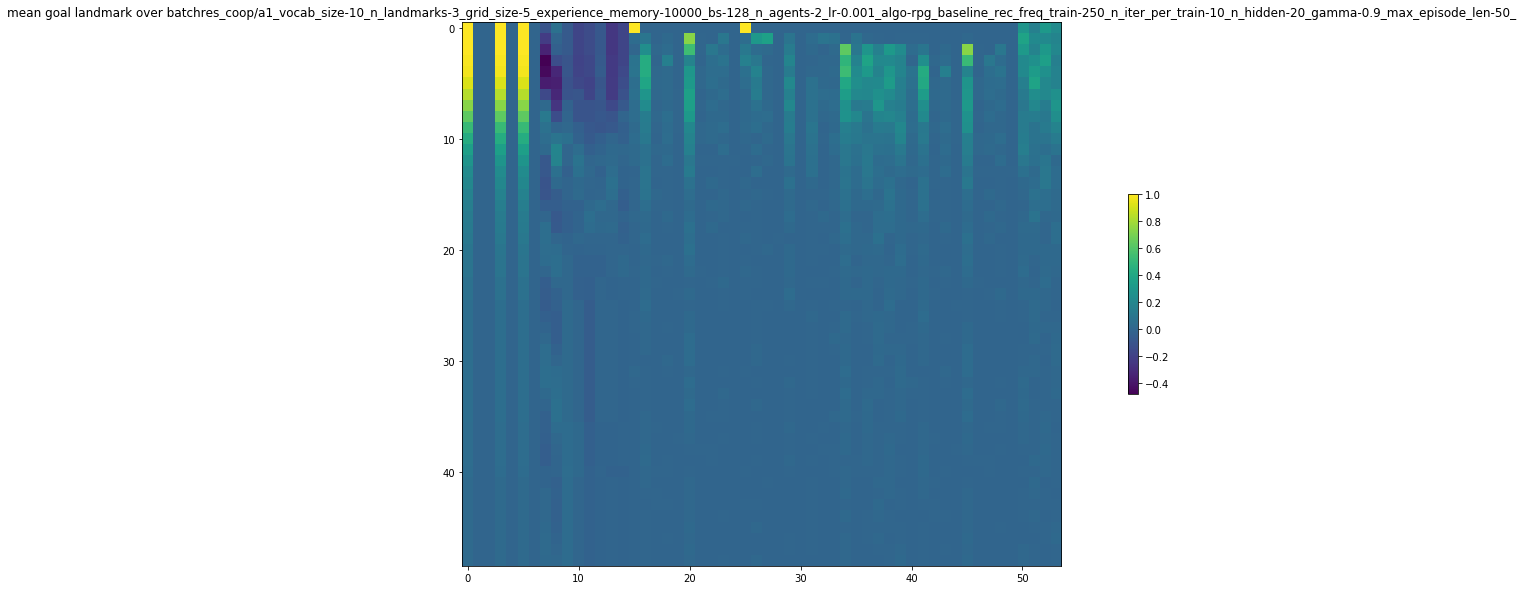

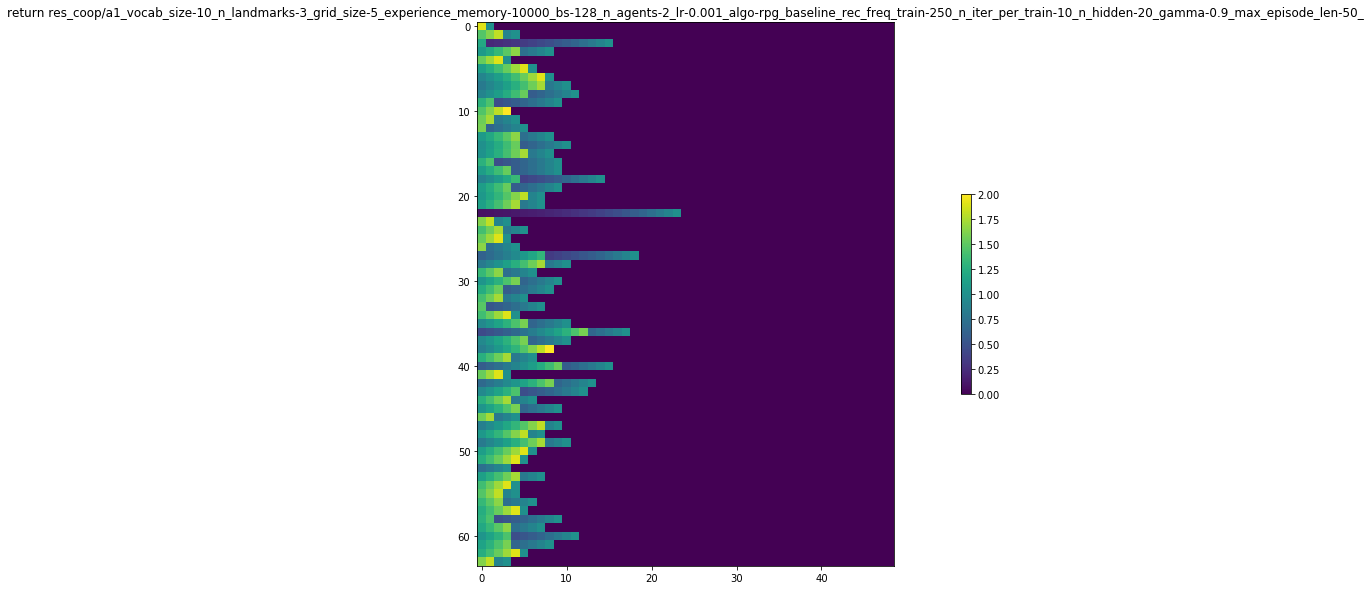

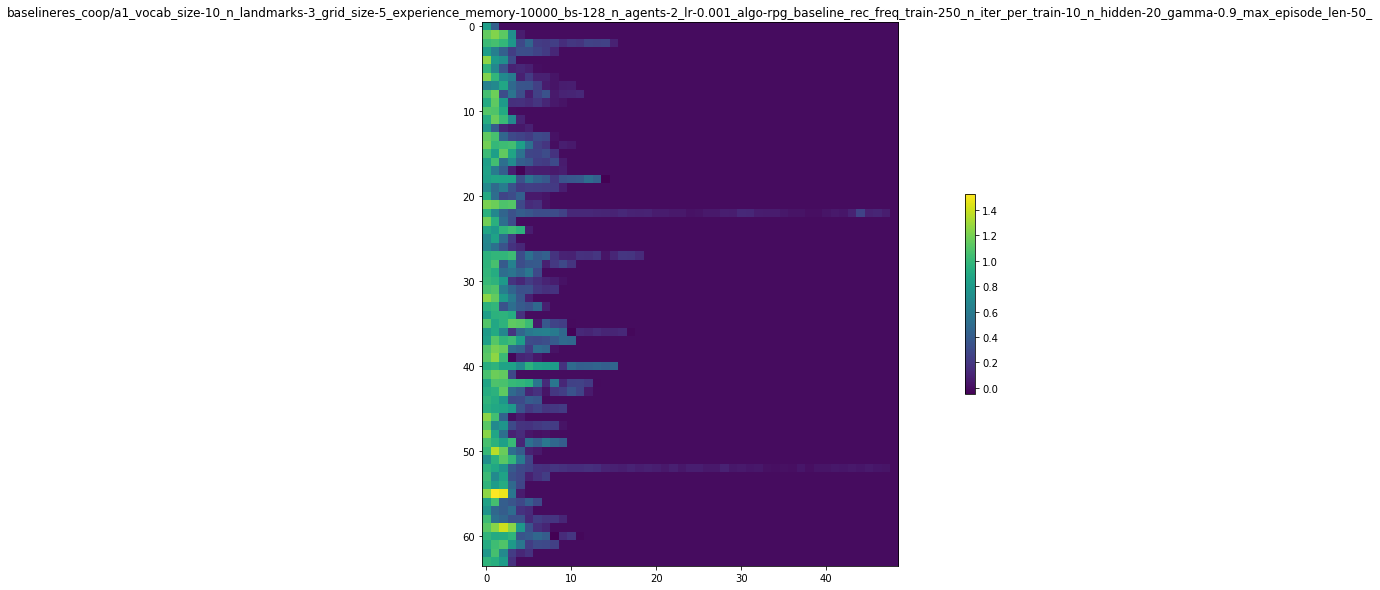

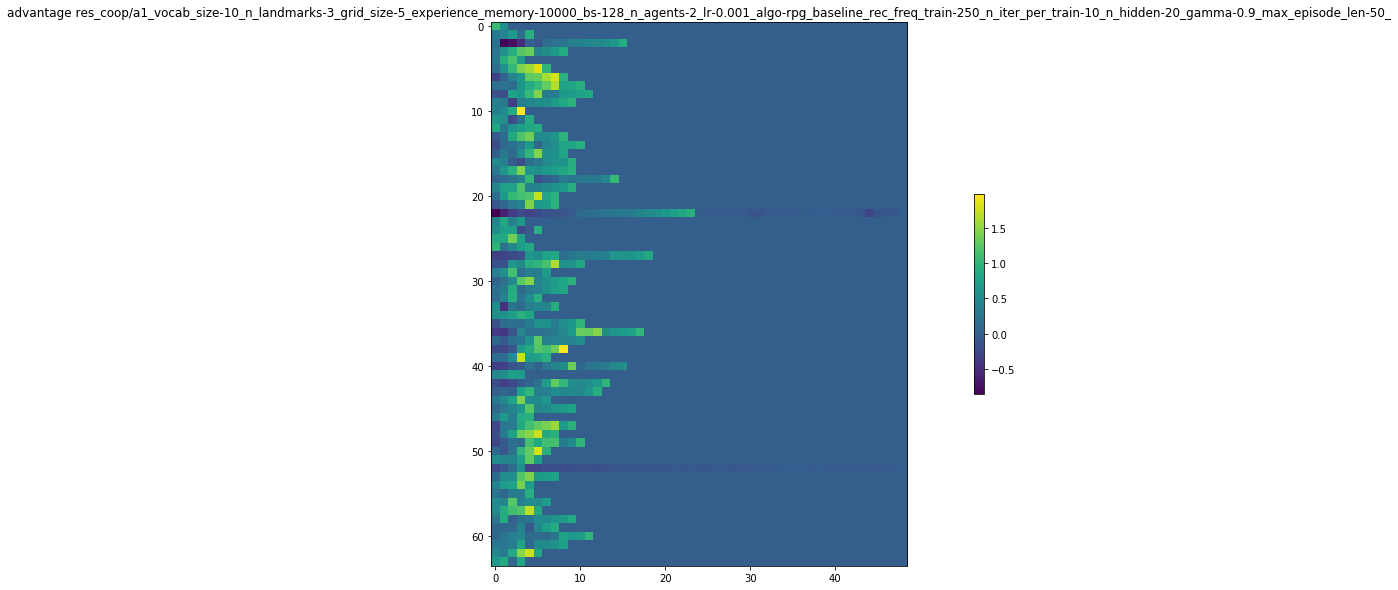

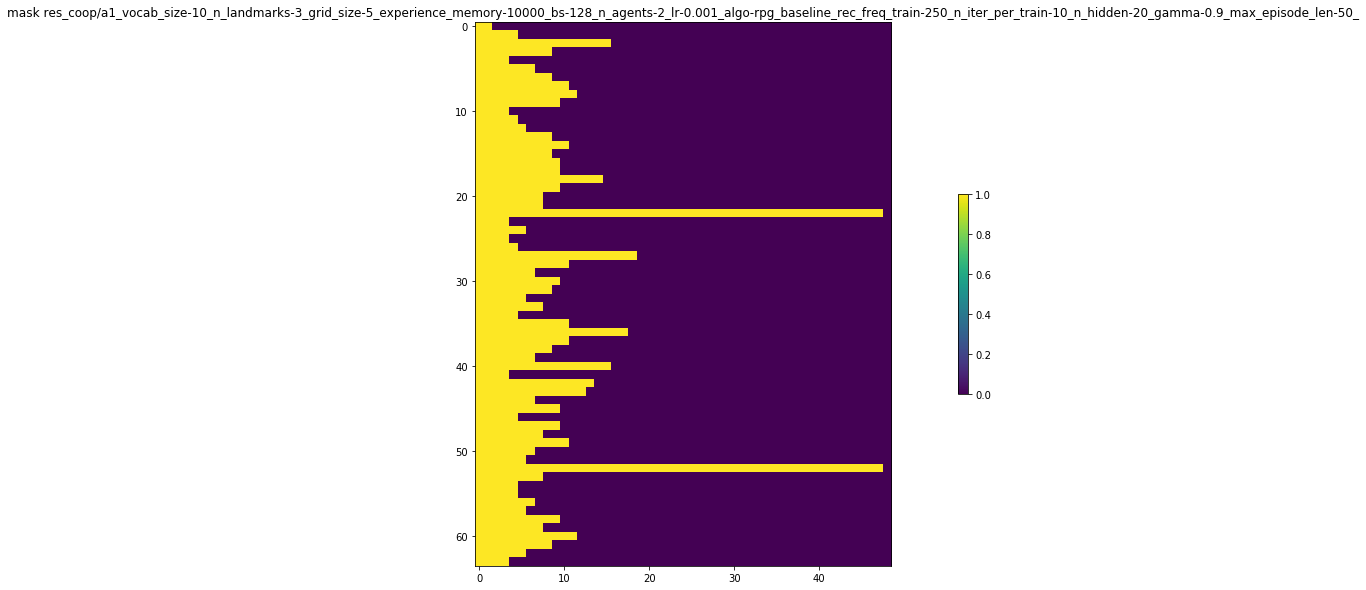

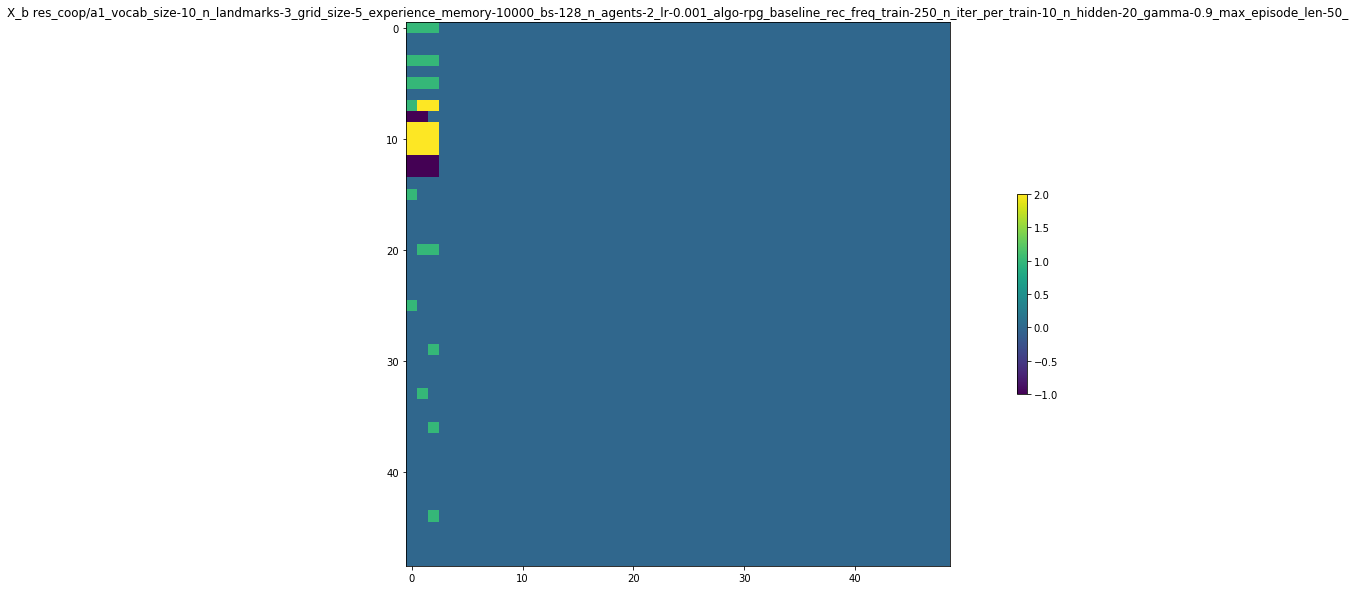

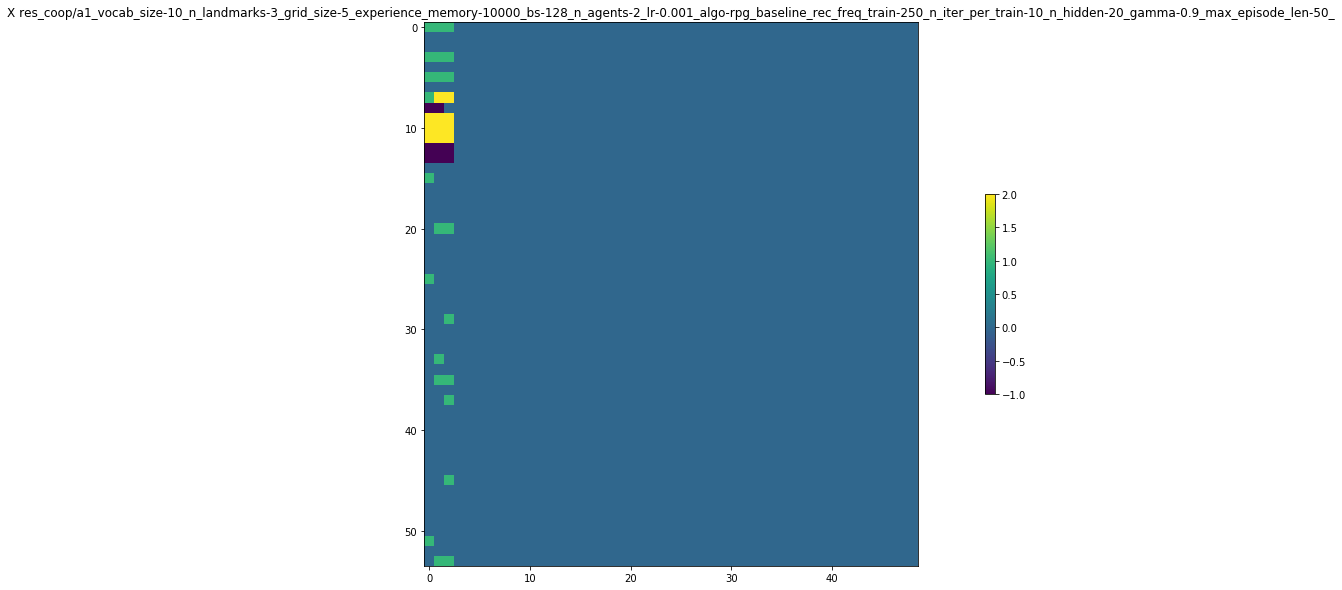

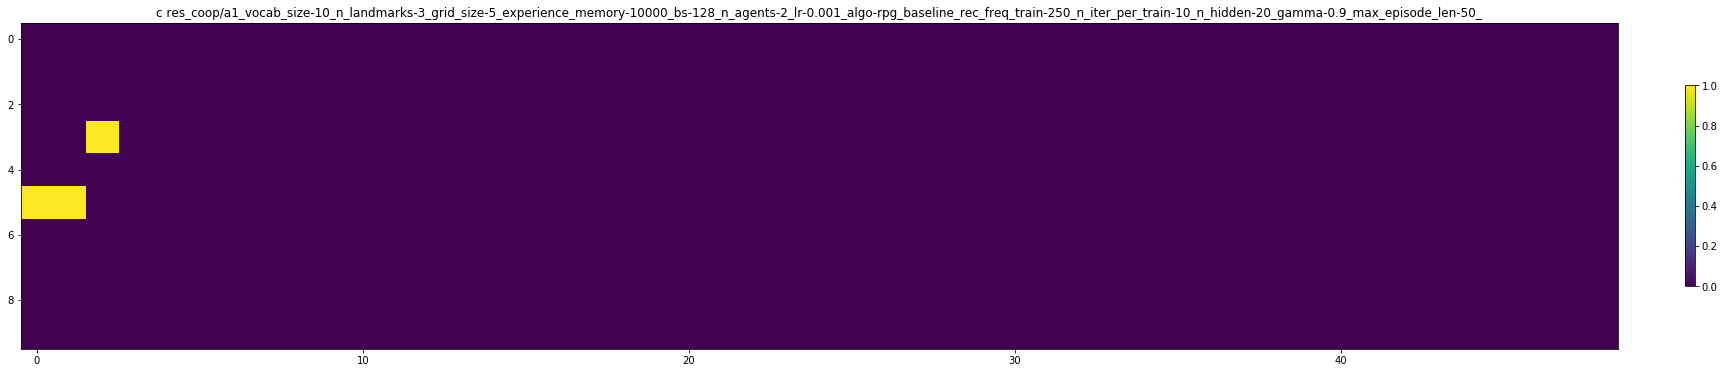

X_b [[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
X [[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]]
mask [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
R [ 1.9  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. ]
b [ 0.83579709  0.43289884  0.43289884  0.43289884  0.43289884  0.43289884
  0.43289884  0.43289884  0.43289884  0.43289884  0.43289884  0.4

In [44]:
import re
#pattern = re.compile("^.*full_len50more.*$")
pattern = re.compile("^.*a1_vocab_size-10_n_landmarks-3_grid_size-5_experience_memory-10000_bs-128_n_agents-2_lr-0.001_algo-rpg_baseline_rec_freq_train-250_n_iter_per_train-10_n_hidden-20_gamma-0.9_max_episode_len-50_.*$")
results_dir = "res_coop"

experience_dirs = [results_dir + "/" + d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]

for exp_dir in experience_dirs:
    if pattern.match(exp_dir):
        print "exp dir", exp_dir
        #analyze_experience(exp_dir)
        analyze_batch(exp_dir)
    